In [1]:
import cv2
import numpy as np
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from plantcv.learn import train_kmeans

In [2]:
# Set input variables"R:\01-Organize\01-Management\01-Data Center\Brisk\06-AI & Machine Learning (D0340)\04-IOT_Smartfarm\picture_original_sideview_smartfarm\picture_sideview_11092025_133003.jpg"
args = WorkflowInputs(images=[r"R:\01-Organize\01-Management\01-Data Center\Brisk\06-AI & Machine Learning (D0340)\04-IOT_Smartfarm\picture_original_sideview_smartfarm\picture_sideview_16092025_134059.jpg"],
                      names="image",
                      result="plantcv_results.csv",
                      debug="plot")

# Set variables
pcv.params.debug = args.debug
pcv.params.dpi = 100
pcv.params.text_size = 0.5
pcv.params.text_thickness = 2

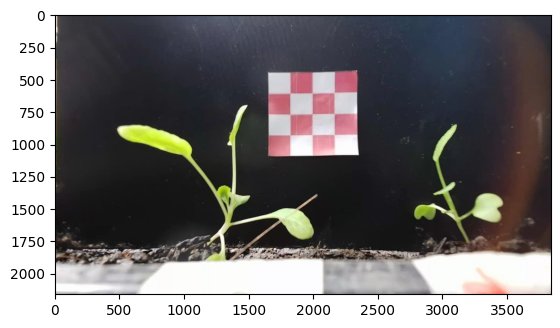

In [3]:
img, imgpath, imgname = pcv.readimage(filename=args.image)

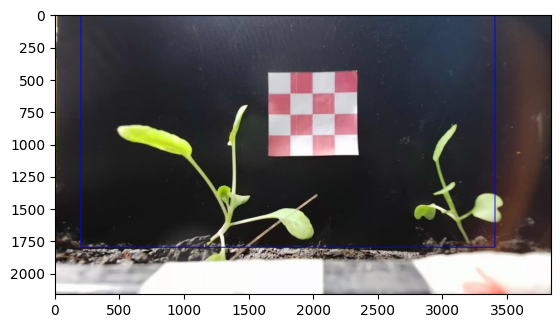

In [45]:
crop_img = pcv.crop(img=img, x=200, y=0, h=1800, w=3200)

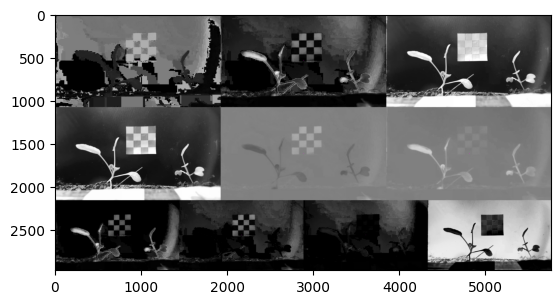

In [46]:
colorspaces = pcv.visualize.colorspaces(rgb_img=img, original_img=False)

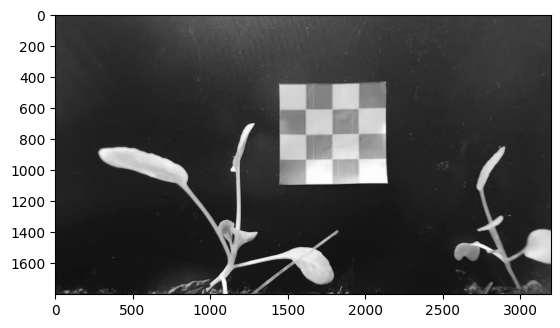

In [30]:
gray = pcv.rgb2gray(rgb_img=crop_img)

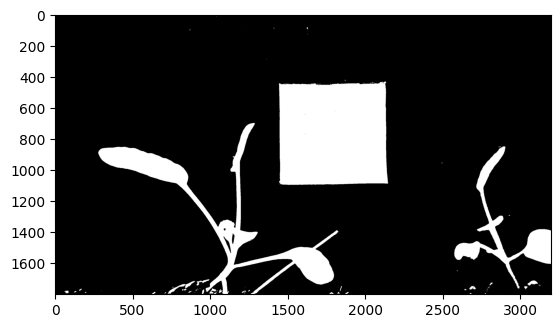

In [31]:
th = pcv.threshold.otsu(gray_img=gray, object_type='light')  

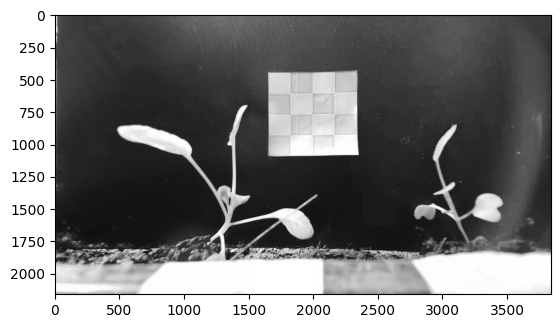

In [47]:
v = pcv.rgb2gray_hsv(rgb_img=img, channel='v')

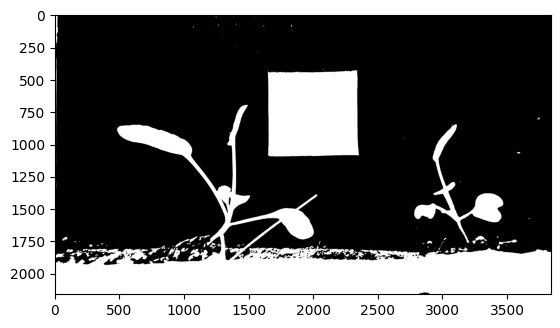

In [50]:
th = pcv.threshold.binary(gray_img=v, threshold=120, object_type='light')

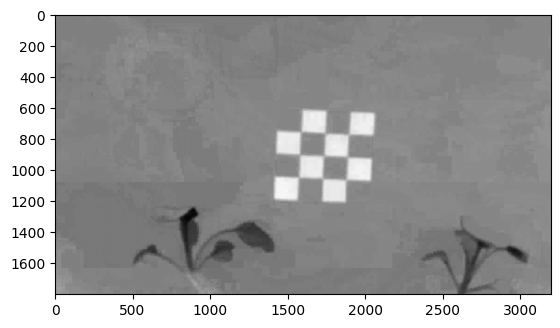

In [24]:
a = pcv.rgb2gray_lab(rgb_img=crop_img, channel='a')

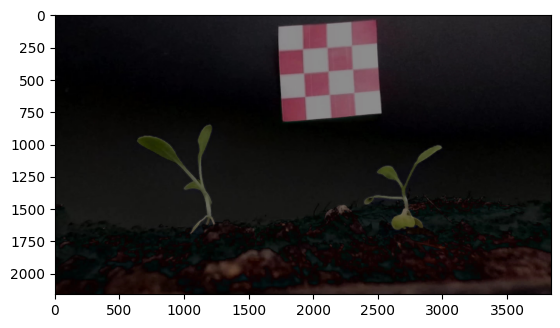

In [6]:
boundary_image = pcv.analyze.bound_horizontal(img=img, labeled_mask=b, line_position=1500, n_labels=1)

In [27]:
hist_a = pcv.visualize.histogram(img=a, bins=25)

alt.Chart(...)

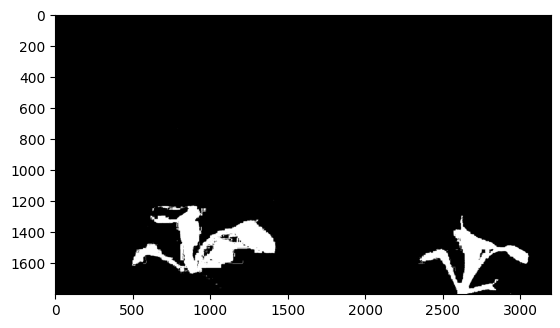

In [27]:
thresh = pcv.threshold.binary(gray_img=a, threshold=122, object_type='dark')

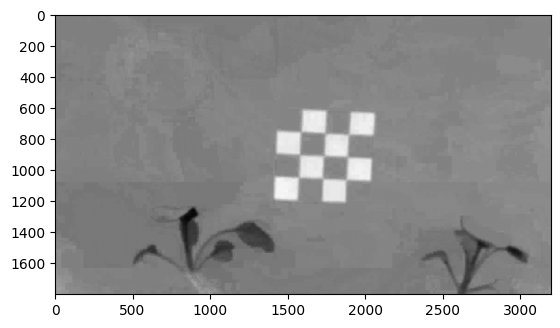

In [9]:
scaled_img = pcv.transform.rescale(gray_img=a)

In [58]:
pts = [(165, 104), (119, 134)]

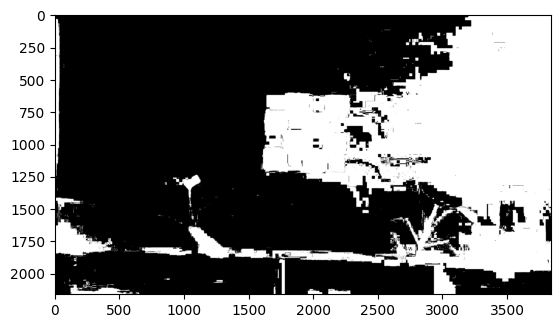

In [60]:
mask = pcv.threshold.dual_channels(rgb_img=img, x_channel='b', y_channel='a', points=pts, above=True)

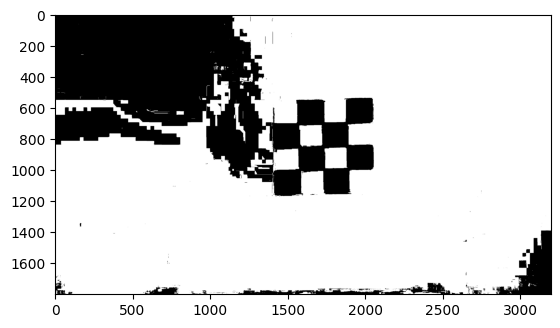

In [46]:
thresh = pcv.threshold.binary(gray_img=scaled_img, threshold=123, object_type='dark')

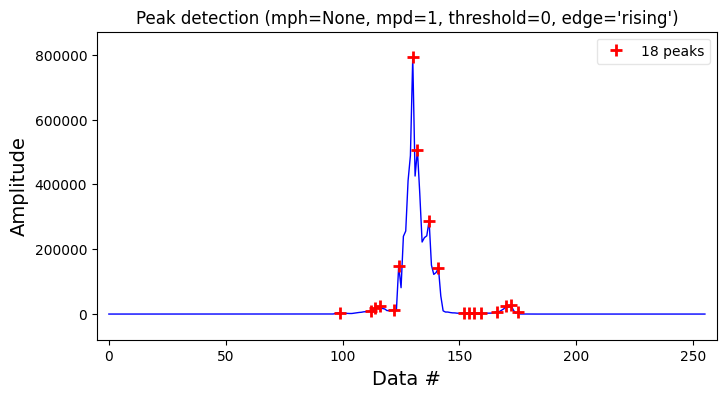

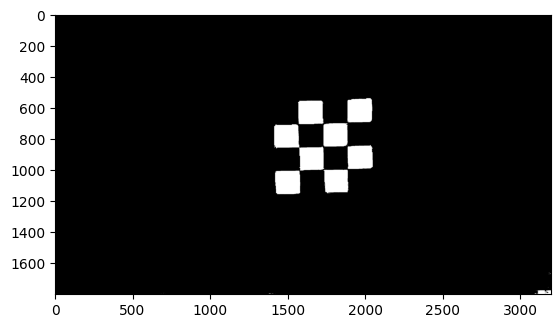

Threshold value = 150


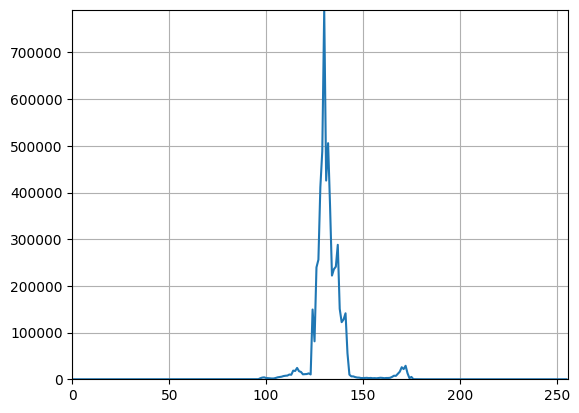

In [50]:
thresholded = pcv.threshold.triangle(gray_img=a, object_type='light', xstep=10)

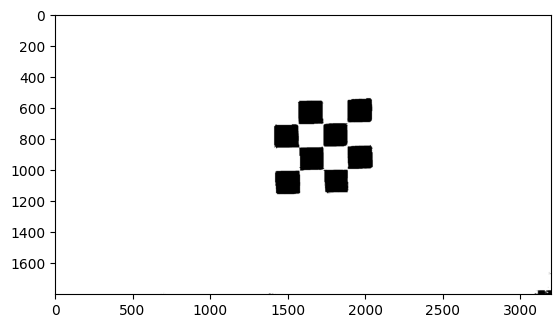

In [ ]:
threshold_mean = pcv.threshold.otsu(gray_img=scaled_img, 
                                    object_type='dark')

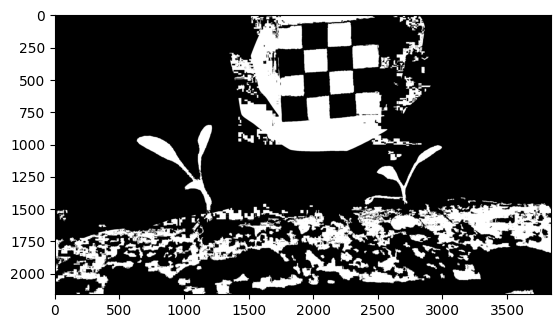

In [9]:
a_fill = pcv.fill(bin_img=threshold_mean, size=200)

There were 5140 objects not annotated.


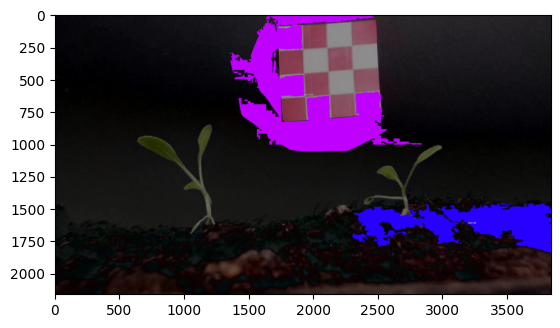

In [12]:
plotting_img = pcv.visualize.obj_sizes(img=img, mask=a_fill, num_objects=2)

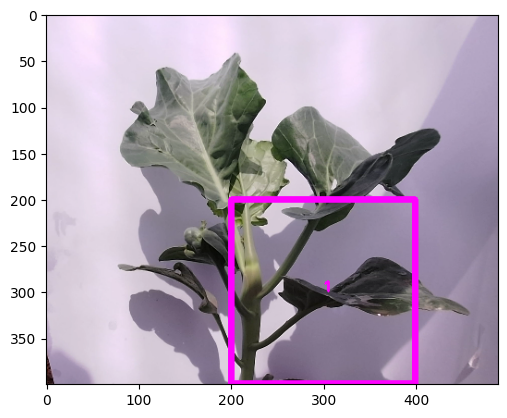

In [13]:
roi = pcv.roi.rectangle(img=img, x=200, y=200, h=200, w=200)

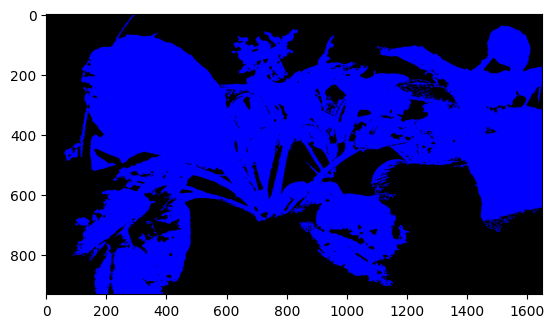

In [22]:
labeled_mask, num_plants = pcv.create_labels(mask=a_fill, rois=roi, roi_type='partial')